<a href="https://colab.research.google.com/github/hectorcamachoz/Proyecto_1_InteligenciaArtificial/blob/main/P1_594557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1.

El objetivo de este proyecto es realizar un modelo que prediga el numero bicicletas rentadas en un dia, utilizando los siguientes datos:
- dteday - Dia
- season - Temporada
- yr - Año
- mnth - Mes
- holiday - Festividad
- weekday - Dia entre semana
- workingday - Dia laboral
- weathersit - Clima
- temp - Temperatura (°C)
- atemp - Sensacion termica
- hum - Humeadad
- windspeed - Velocidad del aire
- casual - Usuarios Casuales
- registered - Usuarios Registrados
- cnt - Numero de bicicletas rentadas

Los detalles de cada variable se encuentran en el archivo 'Descripcion_vars.txt'

Esta base de datos cuenta con 731 observaciones y cuenta con 14 variables, sin contar la variable instant, que es el index, y la variable de salida Cnt que es el numero de bicicletas rentadas.

**1.** Primero se importara la base de datos, para conocer sus caracteristicas, para despues comenzar a hacer una seleccion de variables.

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('day.csv')

print('Una muestra de las primeras 5 observaciones:\n',df.head())

print('\nEl tamaño de nuestra base de datos: ',df.shape)

print('\nTipo de variables en la base de datos:\n',df.dtypes)



Una muestra de las primeras 5 observaciones:
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  


Con esta informacion no se que tipo de regresion es la mejor opcion, para eso necesito establecer las variables, en variables cuantitativas.

Para comenzar, primero se deben de cambiar algunas variables categoricas, la mas obvia es la variable dteday, que es la fecha, despues tenemos variables que son valores enteros, pero pueden llegar a tener valores repetitivos como la temporada, el año, el mes, si es entre semana, el clima, y el dia de la semena.
Para comenzar eliminare la variable de la fecha, considero que no podria sacar informacion nueva que sea relevante, ya que las otras variables especifican si es fin de semana, o si hay alguna fetividad. Tambien eliminare la variable instant, ya que simplemente indica el index. Por ultimo la variable mes, la eliminare, ya que considero que asi como la fecha, no me aporta informacion extra.


In [250]:
df = df.drop('instant', axis=1)
df = df.drop('dteday', axis= 1)
df = df.drop('mnth', axis = 1)


Para continuar, utilizare la funcion get_dummies, para la temporada, el clima. Considero que la variable de weekday y workingday, nos dicen la misma informacion interpretada diferente, por lo tanto, eliminare la variable weekday.

In [251]:
df = df.drop('weekday', axis=1)
df = pd.get_dummies(df, columns=['season', 'weathersit'],drop_first=False, dtype = int)


df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0,0,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0,1,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0,1,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0,1,0,0


Ahora, hare una tabla de correlacion para verificar si, tengo algunas variables esten correlacionadas.

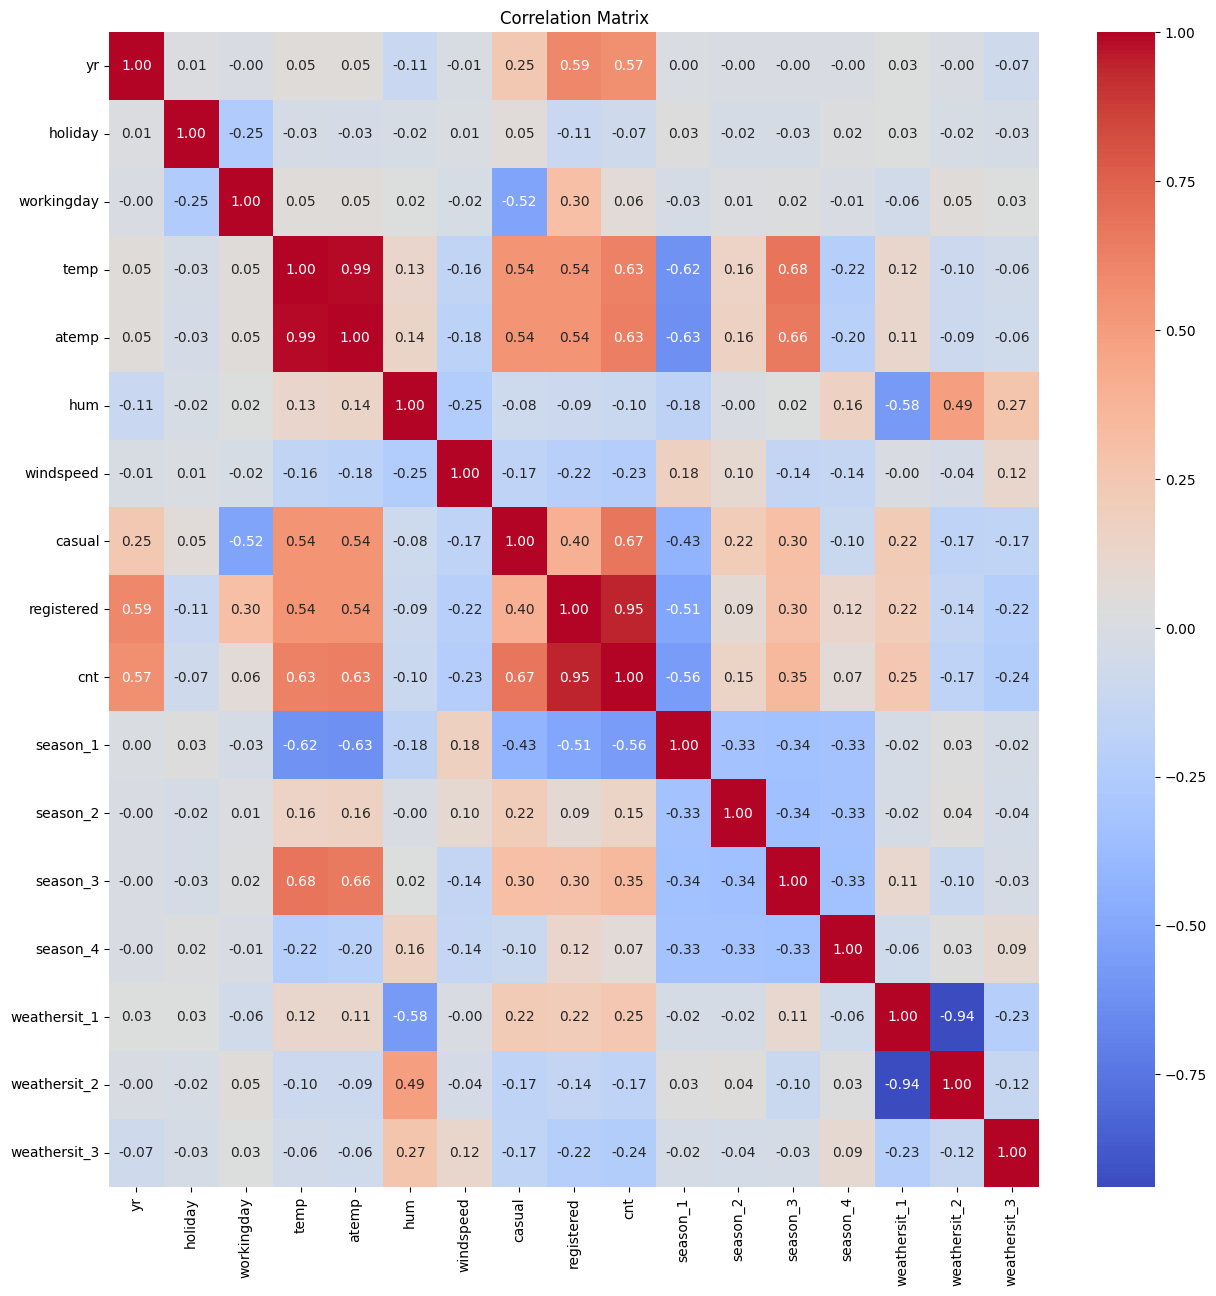

In [252]:
corr_matx = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matx, annot=True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

Al observar la tabla de correlacion, podemos concluir principalmente dos cosas. La primera es que se puede observar una correlacion muy grande entre la temperatura y la sensacion termica, esto tiene sentido ya que las mediciones suelen tener una diferencia minima, ambas variables tienen la misma correlacion con la variable de salida, por lo tanto, eliminare la variable atemp.

Por ultimo, me di cuenta que las variables casual y registered, junto con mi variable de salida, estan midiendo lo mismo, ya que si sumo la variable casual y la variable registered, me dara el resultado de mi variable, por lo tanto las eliminare ambas. Este modelo, sera utilizado para predecir cuantas bicicletas se van a rentar en un dia futuro, asi que no seria utili recibir datos, de un dia que no ha sucedido.

In [253]:
df = df.drop('atemp', axis = 1)

df = df.drop('casual', axis = 1)
df = df.drop('registered', axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,985,1,0,0,0,0,1,0
1,0,0,0,0.363478,0.696087,0.248539,801,1,0,0,0,0,1,0
2,0,0,1,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,0
3,0,0,1,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,0
4,0,0,1,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,0


Asi es como nos queda la base de datos limpia, lo unico que falta para terminar es observar si en la base de datos hay huecos.

In [254]:
print('Cantidad de Huecos en la base de datos:\n',df.isnull().sum())


Cantidad de Huecos en la base de datos:
 yr              0
holiday         0
workingday      0
temp            0
hum             0
windspeed       0
cnt             0
season_1        0
season_2        0
season_3        0
season_4        0
weathersit_1    0
weathersit_2    0
weathersit_3    0
dtype: int64


En el bloque anterior, se puede observar que no existe ningun hueco.

Para continuar con el proyecto, el siguiente paso que se realizara es una seleccion de caracteristicas hacia adelante y hacia atras, para determinar que variables son las mas importantes para mi salida, utilizare esta metodologia, por que quiero el menor numero de variables para asi utilizar menos poder computacional al momento de correr el modelo.

Hasta ahora se han eliminado las variables, mnth (mes), dteday(fecha), atemp(sensacion termica), instant (index), casual(Usuarios casuales), y registered(usuarios registrados). Pero antes de todo, se debe de dividir el conjunto de datos en entrenamiento y prueba.

In [255]:
from sklearn.model_selection import train_test_split



train, test = train_test_split(df, test_size=0.3, random_state=0)
print('Tamaño de particion de datos de entrenamiento: ', train.shape)
print('Tamaño de particion de datos de prueba: ',test.shape)
print(train.shape[0] , '+', test.shape[0] ,'=', int(train.shape[0]) + int(test.shape[0]))

X_train = train.drop('cnt', axis=1)
y_train = train['cnt']
X_test = test.drop('cnt', axis=1)
y_test = test['cnt']

Tamaño de particion de datos de entrenamiento:  (511, 14)
Tamaño de particion de datos de prueba:  (220, 14)
511 + 220 = 731


In [256]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

md_seleccion = LinearRegression()

sfs = SFS(md_seleccion, k_features= 'best',forward=True, floating = True, scoring='r2',cv=5)
sfs.fit(X_train, y_train)

selected_features = list(sfs.k_feature_names_)
print('Caracteristicas seleccionadas: ', selected_features)
print('R2 score: ', sfs.k_score_)



Caracteristicas seleccionadas:  ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']
R2 score:  0.7969853119382877


Se puede observar que la seleccion, resulto con 11 variables y cuenta con un r2 de 0.7969, lo cual no esta tan mal.

A continuacion, se realizara un modelo lineal multiple utilizando las variables de la seleccion de caracteristicas, realizada anteriormente. Para comenzar, se eliminaran las variables que no fueron seleccionadas en el proceso anterior. Se utilizara la funcion OLS de statsmodels.api, esto para facilitar la visualizacion de datos importantes, que se despliegan de manera mas sencilla utilizando OLS, para el analisis del modelo como el estadisitcio F, p-values, coeficientes, intervalos. Despues, con este mismo modelo, se le ajustaran los datos de prueba para observar de cuanta calidad es este modelo utilizando RSE.

In [267]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

md_lineal = sm.OLS(y_train, sm.add_constant(X_train_selected))
results = md_lineal.fit()
print('Modelo utilizando funcion OLS de statsmodels.api:\n',results.summary())





Modelo utilizando funcion OLS de statsmodels.api:
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     236.5
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          4.69e-174
Time:                        03:21:59   Log-Likelihood:                -4157.5
No. Observations:                 511   AIC:                             8335.
Df Residuals:                     501   BIC:                             8377.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Al observar los resultados del modelo generado con la funcion OLS, se puede decir que 11 de las 12 variables (sin contar Beta0) tienen una relacion significativa con la salida, la unica variable que no es significativa fue workingday (Dia laboral). Tambien, se puede observar que el valor de r2 ajustada es de 0.806, queriendo decir que el modelo lineal se adapta de una buena forma a los datos. Y por ultimo, pero lo mas importante, es el p-value del estadistico F, que nos dio aproximado a 0, queriendo decir que las probabilidades de que un coeficiente sea 0 es minima, por lo tanto este modelo es significativo.

Para experimentar, se eliminara la variable wrokingday, y se volvera a generar un modelo, para verificar si esto da mejores resultados, si no es asi, simplemente no se borrara la variable.

In [258]:
X_train_selected_2 = X_train_selected.drop('workingday',axis = 1)
X_test_selected_2 = X_test_selected.drop('workingday',axis = 1)

md_lineal_2 = sm.OLS(y_train, sm.add_constant(X_train_selected_2))
results_2 = md_lineal_2.fit()
print('Modelo utilizando funcion OLS de statsmodels.api:\n',results_2.summary())


Modelo utilizando funcion OLS de statsmodels.api:
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     236.5
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          4.69e-174
Time:                        03:00:20   Log-Likelihood:                -4157.5
No. Observations:                 511   AIC:                             8335.
Df Residuals:                     501   BIC:                             8377.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Se puede observar que la r2 ajustada se mantuvo igual, y el estadistico F aumento por 23 unidades, por lo tanto, esto nos dice que este modelo es mas significativo. De ahora en adelante nuestro modelo lineal sera este.

In [259]:
selected_features.remove('workingday')


RSE modelo lineal:  836.6551466195731
R2 score:  0.8311627434294686


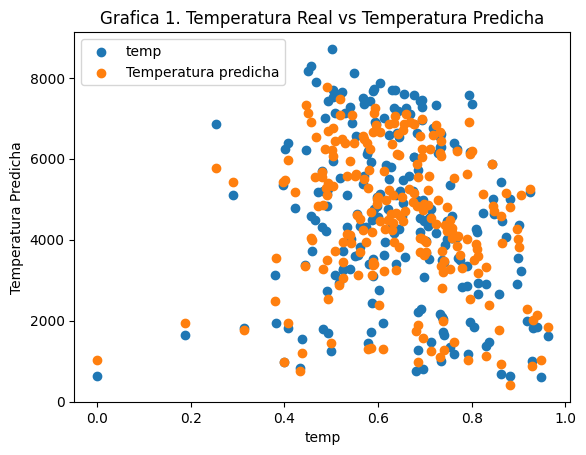

In [268]:
y_pred = results_2.predict(sm.add_constant(X_test_selected_2))

RSS_md = sum((list(y_test)-y_pred)**2)
RSE_md = np.sqrt(RSS_md/(len(y_test)-1))
print('\nRSE modelo lineal: ',RSE_md)
r2 = r2_score(y_test, y_pred)
print('R2 score: ', r2)

plt.scatter(X_test_selected_2[selected_features[2]], y_test, label=selected_features[1])
plt.scatter(X_test_selected_2[selected_features[2]], y_pred, label='Temperatura predicha')
plt.legend()
plt.title('Grafica 1. Temperatura Real vs Temperatura Predicha')
plt.xlabel(selected_features[1])
plt.ylabel('Temperatura Predicha')
plt.show()


Observando el valor de RSE, nos dice que cada prediccion tiene un promedio de error del 836.65, en lo personal considero que este numero es muy alto, tambien se puede observar el r2 de los datos de prueba en el modelo, y nos dio una r2 cuadrada ligeramente diferente por lo tanto no hay problemas de sobreajuste.

En la grafica se observa la temperatura real contra la temperatura predicha, y se puede ver el error en ciertas areas de la grafica.

Se generara un modelo cuadratico para comparar resultados, y decidir cual es un mejor modelo.

In [277]:
from sklearn.preprocessing import PolynomialFeatures
x_train_reshaped = X_train_selected_2.values.reshape(-1, X_train_selected_2.shape[1])
x_test_reshaped = X_test_selected_2.values.reshape(-1, X_test_selected_2.shape[1])

polyq_train = PolynomialFeatures(degree=2).fit(x_train_reshaped)
plyq_test = PolynomialFeatures(degree=2).fit(x_test_reshaped)

xq_train = pd.DataFrame(polyq_train.transform(x_train_reshaped))
xq_test = pd.DataFrame(plyq_test.transform(x_test_reshaped))

md_cuadratico = sm.OLS(list(y_train), xq_train).fit()

print(md_cuadratico.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     86.15
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          3.45e-195
Time:                        03:32:01   Log-Likelihood:                -4015.9
No. Observations:                 511   AIC:                             8122.
Df Residuals:                     466   BIC:                             8312.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           -571.2104    989.084     -0.578      0.5

Al analizar los resultados, se puede observar una r2 ajustada de 0.880, y el estadistico F es de 86.16, y su p-value es aproximado a 0. Algunas de los p-values de las variables son mayores a 0.05, por lo que no todas son significativas con nuestra salida. Ahora, se utilizara la funcion predict con los valores de xq_test, para de ahi calcular el RSE y el r2 de las predicciones.

In [278]:
yhat_md = md_cuadratico.predict(xq_test)
RSS_md_cuadratico = sum((list(y_test)-yhat_md)**2)
RSE_md_cuadratico = np.sqrt(RSS_md_cuadratico/(len(y_test)-1))
print('\nRSE modelo cuadratico: ',RSE_md_cuadratico)
r2 = r2_score(y_test, yhat_md)
print('R2 score: ', r2)


RSE modelo cuadratico:  804.449626859009
R2 score:  0.8439107398874591


Se puede observar que el RSE es de 804.44 unidades, y el r2 de la prediccion es de 0.8439, este valor al no ser muy distinto del r2, quiere decir que no tenemos problemas de sobreajuste.

Comparando estos resultados contra los del modelo lineal, podemos concluir que el modelo cuadratico es mejor ya que, de acuerdo a la r2 se ajusta de una mejor manera a los datos, y gracias al RSE, se puede decir que es de mejor calidad que el lineal.

